# DESAFIO 2. Datos de Billboard

## Paso 1. Explorar los datos

Cargá el dataset usando Pandas y comenzá a explorar los datos. Guardá en este espacio todos los procesos y análisis exploratorios que hayas hecho, tanto los preliminares como los definitivos. Por favor, indicá cuál(es) es(son) cada uno(s).

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('billboard.csv', encoding = "ISO-8859-1")
df.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

Escribí un breve descripción de los datos. Hacé particular énfasis en los hallazagos que te parezcan relevantes hasta este punto.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

## Paso 2. Limpieza de los datos

Empezá por una limpieza rudimentaria. Reformulá los nombres desprolijos de las variables para que tengan un criterio común, acortá los strings que sean muy largos, buscá datos missing y realizá una imputación (en caso de que te parezca que esto es necesario). En aquellos casos en que decidas que es necesario imputar, explicá cuál es el motivo y justificá la técnica que hayas utilizado para imputar.

In [5]:
# Reformulamos los nombres desprolijos de las variables para que tengan un criterio común
df.columns = ['year', 'artist', 'track', 'time', 'genre', 'entered',
       'peak', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week',
       'x65th.week', 'x66th.week', 'x67th.week', 'x68th.week', 'x69th.week',
       'x70th.week', 'x71st.week', 'x72nd.week', 'x73rd.week', 'x74th.week',
       'x75th.week', 'x76th.week']

In [6]:
df.sample(5)

,year,artist,track,time,genre,entered,peak,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
75,2000,Guy,Dancin',4:08,R&B,1999-12-18,2000-01-01,46,29.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,2000,SheDaisy,I Will.. But,3:40,Country,2000-07-15,2000-09-16,78,74.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,2000,"Hart, Beth",L.A. Song,3:47,Country,1999-11-27,2000-01-15,99,100.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2000,"McGraw, Tim",Some Things Never Change,3:56,Country,2000-05-13,2000-07-01,76,66.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Usando la función `melt()` de Pandas, reformateá el dataset para que tengan el formato "long" en lugar de "wide". Como resultado deberías haber removido la columna 72 'week' y la deberías haber reemplazado por dos: 'Week' y 'Ranking'. Ahora vas a tener múltiples entradas por canción: una por cada semana que haya estado en el ranking de Billboard.

In [7]:
# reformateamos el dataset para que tenga el formato "long" en lugar de "wide"
df = pd.melt(df, df.columns[0:7], var_name="week", value_name="ranking")
df.head(5)

,year,artist,track,time,genre,entered,peak,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [8]:
# reformateamos la columna 'week' removiendo los strings
tmp = df['week'].str.extract("(\d+)", expand=False)
df['week'] = tmp
del(tmp)
df.head()

,year,artist,track,time,genre,entered,peak,week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


In [9]:
# buscamos datos nulos
np.sum(df.isnull())

year           0
artist         0
track          0
time           0
genre          0
entered        0
peak           0
week           0
ranking    18785
dtype: int64

In [10]:
# Exploramos los datos nulos en 'ranking'
df.loc[df['ranking'].isnull(), :].sample(5)

,year,artist,track,time,genre,entered,peak,week,ranking
22562,2000,"Rimes, LeAnn",I Need You,3:42,Country,2000-05-27,2000-08-12,72,NaN
7322,2000,Eminem,The Real Slim Shady,4:42,Rap,2000-05-06,2000-06-24,24,NaN
15085,2000,"Williams, Robbie",Angels,3:56,Rock,1999-11-20,2000-01-22,48,NaN
8944,2000,Jagged Edge,He Can't Love U,3:30,Rock,1999-12-11,2000-01-08,29,NaN
10490,2000,"Jordan, Montell",Get It On.. Tonite,4:34,Rap,1999-10-23,2000-02-12,34,NaN


In [11]:
# Vemos que los datos nulos aparecen a partir de '2', es decir que todos los temas al menos tienen datos en '1'
# Por eso sabemos que no perderemos información si eliminamos datos nulos
df = df.dropna()
df.sample(5)

,year,artist,track,time,genre,entered,peak,week,ranking
6223,2000,"Adams, Yolanda",Open My Heart,5:30,Gospel,2000-08-26,2000-10-21,20,89.0
1931,2000,"Jordan, Montell",Get It On.. Tonite,4:34,Rap,1999-10-23,2000-02-12,7,54.0
1438,2000,"Thomas, Carl",Emotional,4:31,Rock,2000-11-25,2000-12-30,5,54.0
7943,2000,Mya,Case Of The Ex (Whatcha Gonna Do),3:50,Rock,2000-08-19,2000-12-02,26,15.0
1138,2000,"Messina, Jo Dee",Because You Love Me,3:50,Country,2000-01-29,2000-03-11,4,71.0


In [12]:
# convertimos las fechas en timestamps
FI = pd.to_datetime(df['entered'])
FP = pd.to_datetime(df['peak'])

In [13]:
# reemplazamos las columnas "object" por "timestamps"
df = df.drop(['entered', 'peak'], axis=1)
df = pd.concat([df, FI, FP], axis=1)
df.head()

,year,artist,track,time,genre,week,ranking,entered,peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,1,78.0,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria",4:18,Rock,1,15.0,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1,71.0,1999-10-23,2000-01-29
3,2000,Madonna,Music,3:45,Rock,1,41.0,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,1,57.0,2000-08-05,2000-10-14


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
year       5307 non-null int64
artist     5307 non-null object
track      5307 non-null object
time       5307 non-null object
genre      5307 non-null object
week       5307 non-null object
ranking    5307 non-null float64
entered    5307 non-null datetime64[ns]
peak       5307 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 414.6+ KB


## Paso 3. Visualizar los datos

Usando la herramienta de plotting de tu elección, generá visualizaciones que permitan seguir profundizando en el análisis exploratorio de tus datos. No hay un máximo o mínimo de gráficos. Lo que sí es requisito es que haya una lógica y un sentido en la generación de los mismos: tiene que generarse una "historia" clara a partir de los mismos. También deberías en este punto realizar un análisis preliminar de los datos: forma de la distribución, estadísticos y relaciones entre las variables

In [15]:
print(df.groupby(["genre"])["ranking"].describe().sample(5))
print(df.groupby(["artist"])["ranking"].describe().sample(5))

              count       mean        std   min   25%   50%   75%    max
genre                                                                   
Jazz            5.0  51.800000  41.517466   7.0   8.0  66.0  89.0   89.0
Rock         2587.0  42.206803  29.439376   1.0  16.0  36.0  68.0  100.0
Electronica    72.0  62.847222  30.672123   6.0  35.5  76.0  92.0   98.0
Country      1200.0  61.687500  21.874306   1.0  45.0  61.0  80.0  100.0
R&B           261.0  67.632184  21.305713  14.0  54.0  69.0  86.0  100.0
                count       mean        std   min    25%   50%    75%    max
artist                                                                      
Black, Clint     20.0  65.000000  18.243961  44.0  52.50  58.0  84.25  100.0
Eastsidaz, The   16.0  74.625000  17.515231  47.0  62.25  77.0  89.25   99.0
Papa Roach       20.0  65.250000   4.339234  57.0  62.75  64.5  66.75   75.0
Herndon, Ty       8.0  96.625000   2.825269  92.0  94.75  97.0  99.00  100.0
Usher             7.0  69.4

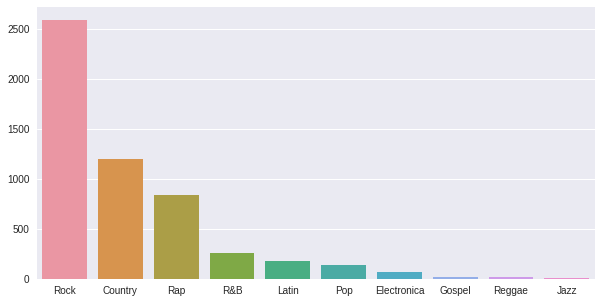

In [16]:
# generamos una variable dummie para 'Género' y graficamos
gen_sort = pd.get_dummies(df['genre']).sum().sort_values(ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(gen_sort.index, gen_sort.values)

plt.show()

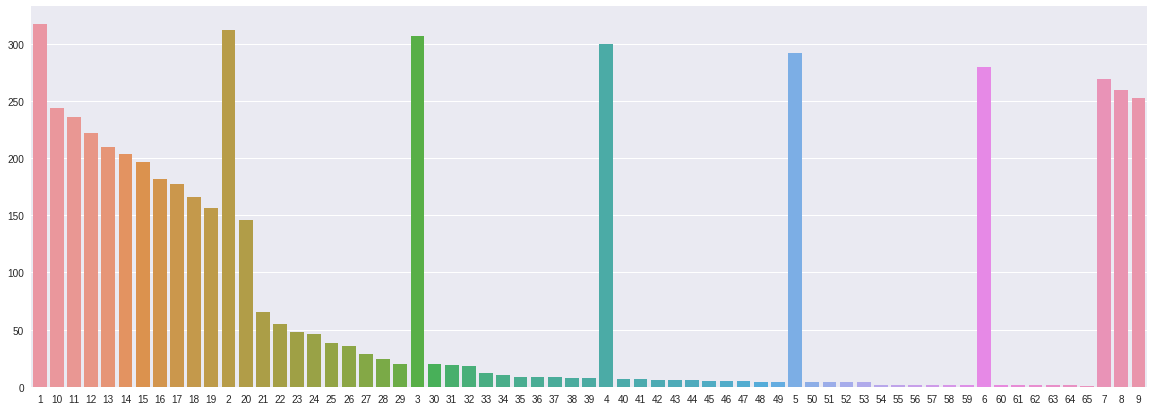

In [17]:
# generamos una variable dummie para 'Semana' y graficamos
sem_sort = pd.get_dummies(df['week']).sum().sort_values(ascending = False)

plt.figure(figsize=(20,7))
sns.barplot(sem_sort.index, sem_sort.values)
plt.show()

,year,artist,track,time,genre,week,ranking,entered,peak,viral


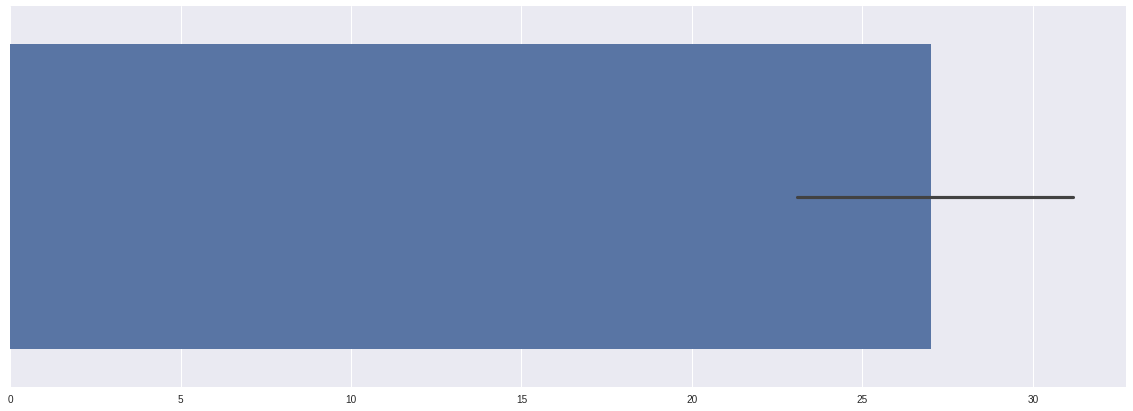

In [104]:
#print(df[(df['peak'] >= '2000-02-14') & (df['peak'] <= '2000-02-29')])
df = df[df['entered'] >= '2000-01-01']

df['viral'] = df['peak'] - df['entered']
df['viral'] = df['viral'].apply(lambda x: x.days)
pivot = df.pivot_table(values='viral',index='week',columns='artist',aggfunc='mean',margins=False)
pivot.columns = pd.Index(pivot.columns.values)
pivot.index = pd.Index(pivot.index.values.astype(int))

plt.figure(figsize=(20,7))
sns.barplot(x=pivot.index)
#df[df['track'].apply(lambda x: 'Love' in x)]
df[(df['viral'] <= 7) & (df['ranking'] <= 10)].sort_values(by='viral')

## Paso 4. Planteo del problema 

Ya tenés hecho el análisis exploratorio del dataset. Ahora es necesario realizar una formulación clara del problema que se va a abordar. Podés incorporar datos externos al dataset, si resultan necesarios para la resolución del problema formulado -solamente, acordate de poner un link a los mismos-. La creatividad es fundamental en este paso.

## Paso 5. Brainstorming para abordar el problema

En forma de listado, comenzá a pensar cuáles serían las formas en que podrías abordar el problema planteado más arriba. No tiene que ser necesariamente un código. Más bien, la idea es idear diferentes estrategias para aprovechar al máximo los datos disponibles en función del problema.

## Paso 6. Crear un reporte con los hallazgos, el código y las visualizaciones

Creá un reporte que describa cada uno de los seis pasos previos. Imaginá que estás describiendo tus datos, visualizaciones, problemas, hallazgos y conclusiones con tus pares. Deberá tener al menos 500 palabras. Y deberá contener el código utilizado para generar las visualizaciones, las pruebas estadísticas realizadas -y cualquier otro método que hayas utilizado- y el análisis e interpretación de los resultados- propiamente dicho.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby(['peak']).describe()

## BONUS: El mismo programa para el que trabajaste te solicita escribir un white paper de al menos 500 palabras sobre el tema "cómo lidiar con la limpieza de los datos". El objetivo es que constituya una presentación para exponer ante una audiencia amplia, así que va a ser necesario incluir casos reales como ejemplos para sustentar tus planteos.

Pista: para empezar hacé una primera búsqueda en internet de artículos, blogposts, papers, videos, etc. En fin... todo lo que  te sirva para entender los desafíos que implica trabajar con datos. Este white paper debería constituir una reflexión original y personal acerca de lo aprendido en esta semana.